# Выбор локации для скважины

## Описание проекта

Руководству добывающей компании "ГлавРосГосНефть" необходимо решить, где бурить новую скважину. Нам  предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Нужно построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

**Цель проекта**

Определить наилучший с точки зрения получения прибыли регион для разработки нефтяных скважин, основываясь на собранных ранее данных о запасах углеводородов.

**Задачи**

1. Изучить исходный датасет и общую статистику факторов, влияющих на запасы месторождений.

2. Подготовить данные для анализа, обработать признаки, разделить на обучающую, валидационную и тестовую выборки.

3. Построить модель линейной регрессии и оценить объемы запасов нефти по регионам.

4. Оценить потенциальную прибыльность месторождений, риск получения убытков и выбрать наиболее перспективный регион.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

from sklearn.linear_model import LinearRegression
from scipy import stats as st
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
region_1 = pd.read_csv('/datasets/geo_data_0.csv')
region_2 = pd.read_csv('/datasets/geo_data_1.csv')
region_3 = pd.read_csv('/datasets/geo_data_2.csv')

Упростим просмотр таблиц и статистики, выведем их вместе. Для этого создадим словарь для всех датафреймов с заголовками и сохраним в переменной data. Напишем цикл для просмотра.

In [3]:
data = {'Регион 1': region_1, 'Регион 2': region_2, 'Регион 3': region_3}

In [4]:
for i in range(0,3):
    print(list(data.keys())[i])
    display(list(data.values())[i].head())
    display(list(data.values())[i].info())
    display(list(data.values())[i].describe())
    print('-----------------------------------------------------------------')

Регион 1


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


-----------------------------------------------------------------
Регион 2


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


-----------------------------------------------------------------
Регион 3


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


-----------------------------------------------------------------


Пока можно сказать, что наибольшими запасами ресурсов обладает третий регион. Пропущенных значений нет, типы данных корректны.

Проверим наши датасеты на наличие дубликатов.

In [5]:
for i in range(0,3):
    print('Количество дубликатов в наборе данных, регион {}: {}'.format(i+1, list(data.values())[i].duplicated().sum()))

Количество дубликатов в наборе данных, регион 1: 0
Количество дубликатов в наборе данных, регион 2: 0
Количество дубликатов в наборе данных, регион 3: 0


Выведем корреляционные матрицы и посмотрим, есть ли какие-то зависимости между признаками.

In [6]:
print('\n', 'Корреляционная матрица, коэф. Пирсона')
for i in range(0,3):
    print(list(data.keys())[i])
    display(list(data.values())[i].corr().style.background_gradient(cmap='coolwarm'))


 Корреляционная матрица, коэф. Пирсона
Регион 1


,f0,f1,f2,product
f0,1,-0.440723,-0.00315334,0.143536
f1,-0.440723,1,0.00172443,-0.192356
f2,-0.00315334,0.00172443,1,0.483663
product,0.143536,-0.192356,0.483663,1


Регион 2


,f0,f1,f2,product
f0,1,0.182287,-0.00177704,-0.0304905
f1,0.182287,1,-0.00259532,-0.0101549
f2,-0.00177704,-0.00259532,1,0.999397
product,-0.0304905,-0.0101549,0.999397,1


Регион 3


,f0,f1,f2,product
f0,1,0.000528283,-0.000448133,-0.00198706
f1,0.000528283,1,0.000778661,-0.00101239
f2,-0.000448133,0.000778661,1,0.445871
product,-0.00198706,-0.00101239,0.445871,1


Зависимости между переменными варьируются по регионам. Из трех факторов сильнее всего на результат влияет f2. И если в регионах 1 и 3 коэффициент корреляции Пирсона на уровне примерно 0.45-0.48, то во втором регионе размеры запасов полностью зависят от этого фактора (коэф. корреляции почти равен 1).
Признаки f0 и f1 оказывают незначительное влияние на объем месторождений только в первом регионе. Плохая новость - по этому же региону наблюдается значительная отрицательная корреляция между самими прогнозирующими факторами f0 и f1 (-0.44).

Проверим наш датасет на наличие зависимостей с помощью еще одного коэффициента - ранговой корреляции Спирмена. Используем тот же код, только функции corr() передадим параметр method='spearman'.

In [7]:
print('\n', 'Корреляционная матрица, коэф. Спирмена')
for i in range(0,3):
    print(list(data.keys())[i])
    display(list(data.values())[i].corr(method='spearman').style.background_gradient(cmap='coolwarm'))


 Корреляционная матрица, коэф. Спирмена
Регион 1


,f0,f1,f2,product
f0,1,-0.471395,-0.00268522,0.128417
f1,-0.471395,1,0.00141251,-0.181143
f2,-0.00268522,0.00141251,1,0.486394
product,0.128417,-0.181143,0.486394,1


Регион 2


,f0,f1,f2,product
f0,1,0.182248,-0.00200008,-0.122869
f1,0.182248,1,-0.00367772,-0.0339083
f2,-0.00200008,-0.00367772,1,0.975605
product,-0.122869,-0.0339083,0.975605,1


Регион 3


,f0,f1,f2,product
f0,1,0.00249302,5.31798e-05,-0.00246354
f1,0.00249302,1,0.000377971,-0.00146252
f2,5.31798e-05,0.000377971,1,0.448463
product,-0.00246354,-0.00146252,0.448463,1


В целом уровни зависимости между факторами и целевым признаком остались прежними. А вот коэффициент Спирмена между прогнозирующими колонками f0 и f1 даже вырос.

Выведем матрицы диаграмм рассеяния, чтобы рассмотреть, каким образом располагаются наши данные.

Регион 1
Регион 2
Регион 3


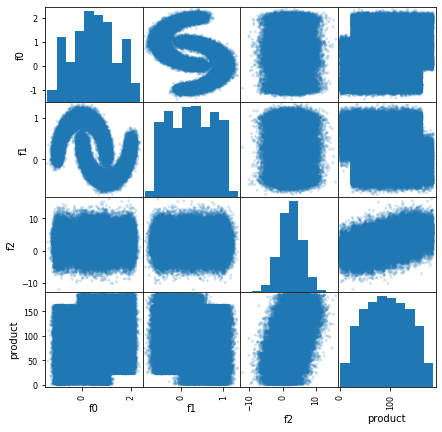

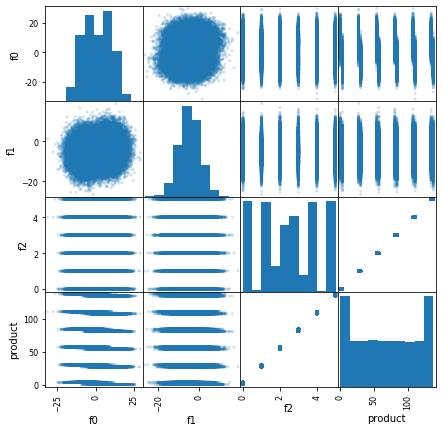

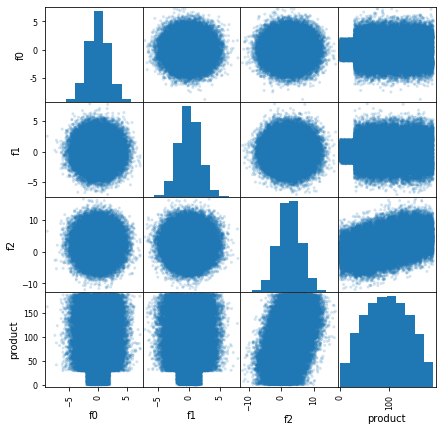

In [8]:
for i in range(0,3):
    print(list(data.keys())[i])
    pd.plotting.scatter_matrix(list(data.values())[i], figsize=(7, 7), alpha=0.2) 

Наиболее "удобная" для модели зависимость - между f2 и целевым признаком, а для второго региона она вообще является определяющей. Зависимость между факторами f0 и f1 нелинейна.

Подготовим наши данные для обучения модели. Разделим датасет на набор прогнозирующих факторов и целевой признак. Из списка прогнозирующих признаков удалим также ID скважины, вряд ли колонка будет полезна для анализа.
Разобъем получившиеся наборы на обучающие и валидационные выборки. Чтобы привести переменные к единому масштабу, стандартизируем их методом StandardScaler() и выведем информацию о размерности получившихся таблиц.

Чтобы не дублировать один и тот же код трижды, оформим все вышеперечисленные действия в цикл и подготовим данные во всех трех таблицах сразу.

In [9]:
regions = {}
l1, l2, l3, l4 = [], [], [], []
numeric = ['f0', 'f1', 'f2']

for i in range(0,3):
    target = pd.Series(list(data.values())[i]['product'])
    features = pd.DataFrame(list(data.values())[i].drop(['id','product'], axis=1))
    f_train, f_valid, t_train, t_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    print('train_' + str(i), f_train.shape, t_train.shape)
    print('valid_' + str(i), f_valid.shape, t_valid.shape, '\n')
    
    scaler = StandardScaler()
    scaler.fit(f_train[numeric])
    f_train[numeric] = scaler.transform(f_train[numeric])
    f_valid[numeric] = scaler.transform(f_valid[numeric])
    
    l1.append(f_train)
    l2.append(f_valid)
    l3.append(t_train)
    l4.append(t_valid)
    
regions = {'features_train': l1, 'features_valid': l2, 'target_train': l3, 'target_valid': l4}    

train_0 (75000, 3) (75000,)
valid_0 (25000, 3) (25000,) 

train_1 (75000, 3) (75000,)
valid_1 (25000, 3) (25000,) 

train_2 (75000, 3) (75000,)
valid_2 (25000, 3) (25000,) 



### Вывод

Для анализа регионов компанией "ГлавРосГосНефть" предоставлено 3 датасета с информацией о факторах, влияющих на запасы месторождений нефти.

В каждом наборе данных 5 колонок по 100000 записей. Пропущенных значений и дубликатов не выявлено, все типы данных корректны. Столбец с id скважины был удален из каждой таблицы из-за отсутствия прогнозируемой значимости.

При предварительном исследовании выявлена положительная корреляция между предиктором f2 и целевым признаком. Зависимости между факторами f0, f1 и целевой переменной обнаружены только в первом и втором регионах (во втором к тому же зависимость нелинейна). Также имеются нецелевые признаки, которые коррелируют между собой - f0 и f1.

В целях подготовки дванных к построению модели, каждый из трех датасетов был разбит на наборы влияющих признаков и целевой признак, на обучающую и валидационную выборки. А чтобы модель не считала какой-то фактор более значимым только из-за разного количества знаков после запятой, все признаки были масштабированы с помощью StandardScaler(). Чтобы заранее не передавать информацию модели, как распределены данные в валидационной выборке, шкалирование произведено уже после разделения датасета на обучающую и валидационную выборки. 

Поскольку коэффициенты корреляции между переменными варьируются в зависимости от местоположения, обучим модель на разных тренировочных выборках для каждого региона отдельно (для получения более точных предсказаний).

## Обучение и проверка модели

Для прогнозирования запасов была выбрана модель линейной регрессии, как наиболее предсказуемая и удобная для интерпретации. Объявим функцию для расчета основных показателей эффективности модели.

In [10]:
model_list = []

def compare_table(regions):
    df = pd.DataFrame(columns=['regions', 'target_product_mean', 'predict_product_mean', 'MSE', 'RMSE', 'R2'])
    for i in range(0,3):
        name = 'region_' + str(i)
        product_mean = regions['target_valid'][i].mean().round(3)
        model = LinearRegression()
        model.fit(regions['features_train'][i], regions['target_train'][i])
        model_list.append(model)
        prediction = model.predict(regions['features_valid'][i])
        pred_product_mean = prediction.mean().round(3)
        mse = mean_squared_error(regions['target_valid'][i], prediction).round(3)
        rmse = (mse ** 0.5).round(3)
        r2 = r2_score(regions['target_valid'][i], prediction).round(3)
        df = df.append({'regions': name, 'target_product_mean': product_mean, 'predict_product_mean': pred_product_mean, 'MSE': mse, 'RMSE': rmse, 'R2': r2}, ignore_index=True)
    return df

Выведем значения основных метрик эффективности модели по трем регионам, применив нашу функцию.

In [11]:
compare_table(regions)

,regions,target_product_mean,predict_product_mean,MSE,RMSE,R2
0,region_0,92.079,92.593,1412.213,37.579,0.280
1,region_1,68.723,68.729,0.798,0.893,1.000
2,region_2,94.884,94.965,1602.378,40.030,0.205


Лучше всех проявляет себя модель, обученная на втором регионе (скорее всего, из-за признака f2).

Проверим, правильно ли у нас сохранились модели в списке. Выведем точку пересечения с осью y и угловые коэффициенты (они должны быть разными для трех моделей, т.к. обучение проходило на разных тренировочных выборках).

In [12]:
for i in range(0,3):
    print('Регион_' + str(i+1))
    print(model_list[i].coef_)
    print(model_list[i].intercept_, '\n')

Регион_1
[ 3.13227436 -7.10817695 21.42556383]
92.64046775305694 

Регион_2
[-1.29948295 -0.1129355  45.88603253]
68.85895465854666 

Регион_3
[ 0.0535809  -0.07250488 19.81965193]
95.03858906371522 



### Вывод

Для прогнозирования запасов нефти и, соответственно, возможной прибыли/ убытков от разработки новых скважин, применена модель линейной регрессии. Модель обучена на прогнозирующих факторах f0, f1 и f2. 
Гиперпараметры для всех территорий одинаковы. Однако, обучена модель на тренировочных данных для каждого региона отдельно, поскольку влияние признаков на объем запасов сильно отличается в зависимости от места.

## Подготовка к расчёту прибыли

Применим нашу модель для прогнозирования богатств месторождений. Для этого создадим список, в котором сохраним три датафрейма (по одному для каждого региона). Каждый датафрейм будет содержать два столбца: фактический объем залежей и предсказанный.

In [13]:
mod_results = []
for i in range(0,3):
    result = pd.DataFrame(regions['target_valid'][i])
    result['prediction'] = model_list[i].predict(regions['features_valid'][i])
    mod_results.append(result)
    
print(mod_results[2].head())    

          product  prediction
71751   61.212375   93.599633
80493   41.850118   75.105159
2655    57.776581   90.066809
53233  100.053761  105.162375
91141  109.897122  115.303310


Рассчитаем точку безубыточности для одной скважины (сколько нефти минимально должна содержать одна скважина, чтобы отработать хотя бы с нулевой прибылью) и для всего региона в целом (сколько нужно добыть нефти в одном регионе, чтобы покрыть затраты на его разработку). Себестоимость разработки двухсот скважин в регионе равна 10 млрд. рублей.

In [14]:
print('Точка безубыточности для одной скважины: {:.3f} тыс. баррелей'.format(10000000000 / 200 / 450000))
print('Точка безубыточности для одного региона: {:.3f} тыс. баррелей'.format(10000000000 / 450000))

Точка безубыточности для одной скважины: 111.111 тыс. баррелей
Точка безубыточности для одного региона: 22222.222 тыс. баррелей


Сравним полученный минимальный для безубыточности объем сырья со средним запасом в каждом регионе. Объявим функцию для расчета фактических и предсказанных запасов черного золота.

In [15]:
def compare_table(results, count):
    df = pd.DataFrame(columns=['regions', 'product', 'prediction'])
    for i in range(0, count):
        reg = 'Регион ' + str(i+1)
        prod = results[i]['product'].mean().round(3)
        pred = results[i]['prediction'].mean().round(3)
        df = df.append({'regions': reg, 'product': prod, 'prediction': pred}, ignore_index=True)
    return df

Применим нашу функцию для подсчета нужных показателей. В качестве аргументов передадим ей список с результатами по регионам и количество регионов.

In [16]:
compare_table(mod_results, 3)

,regions,product,prediction
0,Регион 1,92.079,92.593
1,Регион 2,68.723,68.729
2,Регион 3,94.884,94.965


Среднее количество запасов одной скважины меньше точки безубыточности. Это значит, что нам придется более тщательно выбирать объект для разработки, чтобы не уйти в минус.

### Вывод

Для исследования месторождений на валидационной выборке были спрогнозированы запасы нефти и рассчитана точка безубыточности (111.111 тыс. баррелей). Как показали расчеты, средние объемы сырья в скважинах меньше точки безубыточности. Значит, нужно среди всех скважин выбрать наиболее богатые по запасам и разрабатывать их.

## Расчёт прогнозируемой прибыли

Для каждого региона выберем по 200 скважин с максимальными предсказаниями и посчитаем по ним средние значения. Все три набора "Топ-скважин" сохраним в переменной top_200_boreholes.

In [17]:
top_200_boreholes = []

df = pd.DataFrame(columns=['regions', 'product_mean', 'prediction_mean'])
for i in range(0,3):
    boreholes = mod_results[i].sort_values(by='prediction', ascending=False).head(200)
    top_200_boreholes.append(boreholes)
    reg = 'Топ-200, регион ' + str(i+1)
    df = df.append({'regions': reg, 'product_mean': boreholes['product'].mean(), 'prediction_mean': boreholes['prediction'].mean()}, ignore_index=True)

print(df)    

             regions  product_mean  prediction_mean
0  Топ-200, регион 1    148.009178       155.511654
1  Топ-200, регион 2    137.945408       138.730134
2  Топ-200, регион 3    141.226111       148.019493


Пока наибольший доход приносит регион 1. Посчитаем, сколько каждая скважина теоретически может принести доходов. Для этого напишем функцию для подсчета прибыли с каждой скважины.

In [18]:
def profit_count(volume):
    profit = (volume*450000) - (10000000000 / 200)
    return profit

Применим функцию к трем датафреймам Топ-200 по регионам и выведем по 2 первых строчки получившихся таблиц для оценки корректности работы функции.

In [19]:
for i in range(0,3):
    top_200_boreholes[i]['profit'] = profit_count(top_200_boreholes[i]['prediction'])
    print(top_200_boreholes[i].head(2), '\n')

          product  prediction        profit
93073  162.810993  180.180713  3.108132e+07
46784  153.639837  176.252213  2.931350e+07 

          product  prediction        profit
38665  137.945408  139.818970  1.291854e+07
20191  137.945408  139.773423  1.289804e+07 

          product  prediction        profit
98619  175.103291  165.856833  2.463557e+07
46649  131.627481  165.679685  2.455586e+07 



Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям, а также прибыль для прогнозируемого объёма сырья.

In [20]:
df = pd.DataFrame(columns=['regions', 'product', 'predictions', 'profit'])
for i in range(0,3):
    reg = 'Регион ' + str(i+1)
    df = df.append({'regions': reg, 'product': top_200_boreholes[i].apply(sum)[0], 'predictions': top_200_boreholes[i].apply(sum)[1], 'profit': top_200_boreholes[i].apply(sum)[2]}, ignore_index=True)

display(df)    

,regions,product,predictions,profit
0,Регион 1,29601.835651,31102.330839,3.996049e+09
1,Регион 2,27589.081548,27746.026782,2.485712e+09
2,Регион 3,28245.222141,29603.898658,3.321754e+09


### Вывод

В данном разделе для каждого региона выделены 200 наиболее богатых скважин по предсказанным залежам сырья. На первый взгляд все очень хорошо. Средние значения выше точки безубыточности, а средние прогнозируемые запасы нефти будто бы не слишком отличаются от фактических. Казалось бы, модель отлично работает, пора расчехлять оборудование и разрабатывать регион 1.

Однако здесь нужно вспомнить, что все расчеты прибылей произодились не по фактическим значениям, а по прогнозируемым (ибо если мы будем оценивать скважины, которые только хотим разрабатывать, то мы достоверно не можем знать об истинных объемах). Что если наша модель часто ошибается и завышает запасы ряда объектов, которые могли каким-то образом попасть в нашу выборку? Тем более, высокие показатели эффективности модели были только у региона 2, а он в аутсайдерах нашего рейтинга по запасам. Рассмотрим риски ошибок в следующем разделе.

## Расчёт рисков

Оценим качество модели техникой Bootstrap: насколько модель эффективно прогнозирует объемы запасов. Посмотрим, большим ли будет риск убытков, если при выборе региона руководствоваться предсказаниями модели. Для нас приемлемым уровнем риска будет порог в 2,5% (вероятность убытков должна быть не больше этого значения). 

In [21]:
state = np.random.RandomState(12345)

def revenue(target, prediction, count):
    pred_sorted = prediction.sort_values(ascending=False)
    selected = target[pred_sorted.index][:count]
    return selected.sum()*450000 - 10000000000

state = np.random.RandomState(12345)
    
values_list = []
for i in range(0,3):
    values = []
    for j in range(1000):
        target_subsample = mod_results[i]['product'].sample(n=500, replace=True, random_state=state)
        pred_subsample = mod_results[i]['prediction'][target_subsample.index]
        values.append(revenue(target_subsample, pred_subsample, 200))
    values_list.append(values)

Построим распределение средних значений прибыли по каждому региону. Объявим функцию для построения графика.

In [22]:
def draw_hist(ax, data, title, xlabel):
    ax.hist(pd.Series(data), density=True, bins=40, color='green')
    ax.grid(alpha=0.2, linestyle='--', linewidth=1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)

Передадим функции набор данных, название региона и название оси x.

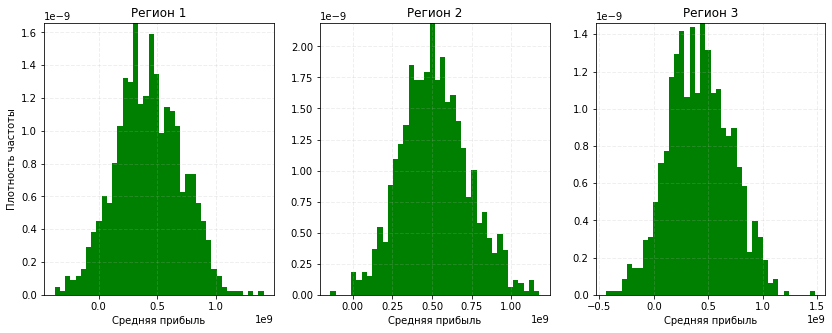

In [23]:
fig, ax = plt.subplots(ncols=3, figsize=(14,5))
draw_hist(ax=ax[0], data=values_list[0], title='Регион 1', xlabel='Средняя прибыль')
ax[0].set_ylabel('Плотность частоты')
draw_hist(ax=ax[1], data=values_list[1], title='Регион 2', xlabel='Средняя прибыль')
draw_hist(ax=ax[2], data=values_list[2], title='Регион 3', xlabel='Средняя прибыль')

По графикам можно сделать вывод, что при выборе любого региона существует риск получения убытков. Но во втором регионе он существенно меньше.

Посчитаем среднее по полученным выборкам, 95% доверительный интервал и риск получения убытков (2,5%-квантиль дохода).

In [24]:
df = pd.DataFrame(columns=['regions', 'profit_mean', '2,5% quantile', '95% conf_interval_student', '95% conf_interval_predict'])
for i in range(0,3):
    reg = 'Регион ' + str(i+1)
    values_list[i] = pd.Series(values_list[i])
    lower = values_list[i].quantile(.025)
    mean = values_list[i].mean()
    conf_interval_student = st.t.interval(alpha=0.95, df=len(values_list[i])-1, loc=values_list[i].mean(), scale=values_list[i].sem())
    conf_interval_predict = (values_list[i].mean() - 1.96 * (np.std(values_list[i], ddof=1)), 
                             values_list[i].mean() + 1.96 * (np.std(values_list[i], ddof=1)))
    df = df.append({'regions': reg, 'profit_mean': mean, '2,5% quantile': lower,'95% conf_interval_student': conf_interval_student, '95% conf_interval_predict': conf_interval_predict}, ignore_index=True)
    
display(df)    

,regions,profit_mean,"2,5% quantile",95% conf_interval_student,95% conf_interval_predict
0,Регион 1,4.259385e+08,-1.020901e+08,"(408732207.0686985, 443144846.7524861)","(-117523848.91811359, 969400902.7392982)"
1,Регион 2,5.182595e+08,1.281232e+08,"(505249881.5766218, 531269105.8180281)","(107350317.49377966, 929168669.9008702)"
2,Регион 3,4.201940e+08,-1.158526e+08,"(402528703.6503615, 437859307.0377386)","(-137765332.6433704, 978153343.3314705)"


В этот раз лучшие результаты получены по региону 2. Более того, это единственный регион, где риск убытков не превышает 2,5%. При подобных результатах разработка месторождений в других местах превращается в лотерею.

### Вывод

С помощью техники Bootstrap с 1000 выборок найдено распределение прогнозируемой прибыли по трем регионам. И хотя при предварительной оценке запасов нефти модель сулила нам золотые горы при разработке региона 1, то при формировании многих выборок и подсчете их средних вырисовалась менее радужная картина. Прибыли оказались значительно меньше, а лучшим для разработки оказался регион 2.

По исходным данным регион 2 обладает самыми низкими запасами сырья. Однако благодаря почти полной положительной корреляции между предсказывающей и целевой переменными, можно почти со 100% точностью предсказать объем углеводородов в той или иной скважине и минимизировать риски.

## Общий вывод

В проекте изучены три нефтяных региона с точки зрения наиболее подходящего места для разработки скважин. При анализе статистических данных выявлены зависимости между факторами и целевым признаком. Обнаружена положительная корреляция между предиктором f2 и целевым признаком, коэффициенты Пирсона-Спирмена 0.48 - 0.47 соответственно. Зависимости между факторами f0, f1 и целевым признаком обнаружены только в первом (коэффициенты 0.15 - 0.13 для f0 и 0.19 - 0.18 для f1) и втором (нелинейная зависимость 0.12 для f0) регионах. Также имеется значительная положительная корреляция между переменными f0 и f1 (порядка 0.44-0.47).

На основе собранных данных построена модель для прогнозирования объёма запасов в новых скважинах. По скважинам с наиболее большими предсказанными залежами нефти рассчитана суммарная прибыль, где лучший результат показал первый регион - 3 996 049 тыс. рублей.

Однако анализ возможных доходов и рисков техникой Bootstrap представил совершенно другие результаты. Регионом с самым низким риском убытков оказался второй (средний доход - 518 259.5 тысяч рублей, а 2,5%-квантиль распределения прибыли равен 128 123.2тысячам). Проблема заключается в том, что модель в регионах 1 и 3 (где нефти больше всего) не может предугадать объемы сырья так же хорошо, как в регионе 2. Этот результат обусловлен почти полной положительной корреляцией между предиктором f2 и целевой переменной.

<strong>В целях минимизации рисков и получения гарантированной стабильной прибыли к разработке месторождений рекомендован регион 2 (файл geo_data_1). </strong> По сути наш выбор обоснован не количеством ресурсов, а качеством модели, их предсказывающих. Модели, обученные на данных по другим регионам, выдают не слишком надежные предсказания, чтобы свести к минимуму риски разработки убыточных скважин, и не смогут превзойти прогнозы по второму региону не выходя за рамки линейной регрессии.